In [25]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.optimize import fsolve

from cohort_model import run_cohort_simulation, get_mean_and_std, MUT_CAPTIVITY, HYP_WILDTYPE

# Presentation of the calculations underlying Figure 2 in Technical Comment XYZ

This notebook contains and explains the calculations underlying Figure 2 in our Technical Comment to da Silva *et al.* (2022). The code makes use of previously constructed functions used in the calculations underlying Omholt and Kirkwood (2021). You find these functions in this repository. 

We have tried to present the code is such a way that it can easily be used to produce a similar figure for other species where this is relevant, i.e. where one has reasonable reliable information about maximum lifespan in captivity under presumably excellent husbandry conditions and where the mortality risk data available clearly show that they they are recorded from animals exposed to an environmental mortalty not characteristic for a phylogenetically wide range of species in captivity. 

Papers referred to in this notebook are 
- da Silva *et al.* (2022): [R. da Silva, D. A. Conde, A. Baudisch, F. Colchero, Slow and negligible senescence among testudines challenges evolutionary theories of senescence. *Science*. **376**, 1466–1470 (2022)](https://doi.org/10.1126/science.abl7811)
- Omholt and Kirkwood (2021): [S. W. Omholt, T. B. L. Kirkwood, Aging as a consequence of selection to reduce the environmental risk of dying. *Proc. Natl. Acad. Sci. U. S. A.* **118**, 1–9 (2021)]

## Upper left panel: Comparing survivorship curves of *Testudo graeca*
This panel shows three survivorship curves associated with the reported annual mortality for *T. graeca*, one of the about 13 species deemed by da Silva *et al.* to display negligible senescence. A species was judged to show negligible senescence if the estimated ageing rate was either zero or negative (see da Silva *et al.* (2022) for more precise definitions). The reason why we picked *T. graeca* as an illustration species was that we have apparently reliable data on its maximum lifespan in captivity (127 years) that compares with the maximum lifespan recorded by da Silva et al. (121 years, kindly provided by F. Colchero in personal correspondence). 

In the panel we depict:
1. the survivorship curve (±3 SD, light red shaded area, mean values not shown) associated with the annual mortality risk reported by da Silva *et al.* (2022);
2. the survivorship curve (blue line (±3 SD)) that follows from the assumption that *T. graeca* is exposed to senescence, and that the mortality risk associated with this senescence gives rise to a survivorship curve that has about the same form as that of female *T. scripta* dying from senescence only (see Fig. 1), but adjusted to the maximum lifespan post sexual maturation reported for *T. graeca* in captivity (i.e. about 120 years);
3. the survivorship curve (black line, only mean values shown) that follows from taking the mortality risk to be the sum of the mortality risk as reported and of the mortality risk associated with senescence that gives rise to the hypothetical blue survivorship curve. 

The mortality risk curve reported by da Silva *et al.* plateaus the last 30 years or so (50-80 years). This can be because *T. graeca* does indeed sport negigible senescence, or it can be because the reported strikingly high initial mortality risk (which can hardly be associated with senescence) causes the population to dwindle so much that when the effect of senescence starts to take its toll, there is not enough individuals left to allow the detection of the relatively weak senescence signal one would expect to be present in a cohort of individuals that can still live 50 years. To test the latter possibility, one is therefore justified in adding the reported mortality risk over time with the mortality risk that gives rise to a frequently observed survivorship curve (like the one sported by female *T. scripta*) in order to quantify the difference between the reported survivorship curve up to 80 years with the one where senescence is included. If the difference is marginal it follows that the reported mortality risk data are ambiguous, and that one is not justified to conclude that the species shows no sign of senescence.    

### Fit a polynomial function to *Testudo graeca* mortality risk data
First, we fit a polynomial function to the mortality risk data for *T. graeca* females (data for males are not reported). The mortality risk data were extracted from materials kindly provided by Fernando Colchero in private correspondence.

All age data in this notebook are adjusted to post sexual maturation (psm), such that time *t* = 0 is set to age at first reproduction. For *T. graeca* this is set to 10 years of age, as reported in Table S2 in Supplementary Materials of da Silva *et al.* (2022).

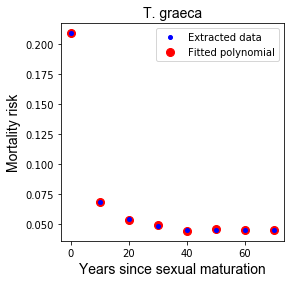

In [26]:
# Manually extracted mean annual mortality risk for T. graeca females in captivity
years_spaced = np.array([0, 10, 20, 30, 40, 50, 60, 70]) # Years psm
mortality_risk_spaced = [0.2091, 0.0682, 0.0545, 0.0482, 0.0455, 0.0455, 0.0455, 0.0455]

# Get the least squares polynomial fit to the data
fitted_polynomial = Polynomial.fit(x=years_spaced, y=mortality_risk_spaced, deg=6)

# Evaluate fitted polynomial function values at same years as in extracted data
fitted_polynomial_values_spaced = fitted_polynomial(years_spaced)

# Plot extracted mortality risk data together with the fitted polynomial
# function values to confirm fit
fig,ax = plt.subplots(figsize=(4,4))
font = {"fontname": "Arial", "fontsize": 14}
ax.set_xlabel("Years since sexual maturation", **font)
ax.set_ylabel("Mortality risk", **font)
ax.set_title("T. graeca", **font)

ax.plot(years_spaced, mortality_risk_spaced, 'bo', zorder=3, markersize=4, label="Extracted data")
ax.plot(years_spaced, fitted_polynomial_values_spaced, 'ro', markersize=8, label="Fitted polynomial")
ax.legend();

### Estimate the $\alpha$ and $\kappa$ values underlying a hypothetical survivorship curve with the same form as *T. scripta* females

Here we show how to create a survivorship curve (S(t)) with approximately the same form as *T. scripta* females dying from senescence only (Fig. 1), but adjusted to the approximate maximum reported lifespan of *T. graeca* in captivity, post sexual maturation ([source](https://genomics.senescence.info/species/entry.php?species=Testudo_graeca)). 

To create the adjusted curve, we take the time *t* at which S(t)=0.95 and S(t)=0.01 for *T. scripta* females and find the ratio of these two time points. Based on the calculations associated with Fig. 1, we find that this ratio is 0.370. Then we demand that the ratio between the time point where the survivorship curve for a cohort of *T. graeca* females, that have just become sexually mature and which die from senescence only, attains the value 0.95, and the time point when S(t) = 0.01 (about 120 years psm), should be the same. This gives 0.370*120 years = 44 years.

We then calculate the integral of the function describing the mortality risk from senescence only up to a given time point *x*: 
$$ 
    \int_0^x\alpha[(1 + \kappa)^{(t + 1)} - 1]dt,
$$
finding it to be
$$
    \frac{1}{\ln (1+\kappa)} \alpha (1+\kappa)^{x+1} - \alpha x - \frac{\alpha (1+\kappa)}{\ln (1+\kappa)}.
$$

We then use the formula given in Supplementary Material of da Silva *et al.* (2022): 
$$
     S(x) = \exp(-\int_0^x \mu(t)dt
$$ 
to obtain an equation for S(x):
$$
    S(x) = exp^{-\frac{1}{\ln (1+\kappa)} \alpha (1+\kappa)^{x+1} - \alpha x - \frac{\alpha (1+\kappa)}{\ln (1+\kappa)}}.
$$

We then demand that S(44) = 0.95 and that S(120) = 0.01, and solve the two equations for $\alpha$ and $\kappa$ by use of the Scipy numerical solver *fsolve*.

In [27]:
# Using the form of the survivorship curve of T. scripta females to derive alpha and kappa for T. graeca
def equations(params):
    alpha, kappa = params
    t_01 = 120                     
    t_95 = 44
    eq1 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) ** (t_95+1) - alpha * t_95 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.95)
    eq2 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) ** (t_01+1) - alpha * t_01 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.01)
    return [eq1, eq2]

# Solve for the two unknowns alpha and kappa
alpha_f, kappa_f = fsolve(equations, (0.000011, 0.079))

print(f"alpha: {alpha_f:.4f}")
print(f"kappa: {kappa_f:.4f}")

alpha: 0.0003
kappa: 0.0562


### Calculate the three different survivorship curves (S(t)) for *T. graeca* alluded to above

The above preparations have put us in position to calculate the survivorship curves associated with: 
1. the reported mortality risk data, 
2. the mortality risk due to senescence only, and 
3. the mortailty risk obtained by adding together the reported mortality risk and the stipulated mortality risk associated with senescence only.

In [28]:
# T. graeca females, captivity (reported data)
t_max_cap = 78 # After running the model, this is the year (plus 1 year) where S(t) is approximately 0.01
hazard_rate_params = dict(population="", expression=fitted_polynomial)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap, std_cap = get_mean_and_std(simulation)

In [40]:
#Verification
mean_cap[77]

0.00965

In [36]:
# T. graeca females, using assumed survivorship curve due to senescence only (same shape as T. scripta females)
t_max_so = 120 # Stipulated maximum age (plus 1 year)
hazard_rate_params = dict(alpha=alpha_f, kappa=kappa_f, population=MUT_CAPTIVITY)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_so)

mean_so_f, std_so_f = get_mean_and_std(simulation)

In [39]:
# Verification
mean_so_f[119]

0.008323

In [47]:
# T. graeca females, mortality risk from reported data plus mortality risk from senescence
def hazard_rate_combined(t):
    """Hazard rate from reported mortality risk for T. graeca females plus senescence.
    
    Ensure that alpha and kappa values are correctly defined in global scope, 
    since they are not provided as parameters. Including more parameters would necessitate a larger 
    rewrite of the previously written cohort simulation code that we did not deem necessary at this point.
    """
    return fitted_polynomial(t) + alpha_f * (((1 + kappa_f) ** (t + 1)) - 1)

hazard_rate_params = dict(population="", expression=hazard_rate_combined)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap_comb_f, std_cap_comb_f = get_mean_and_std(simulation)

In [84]:
# Verification
mean_cap_comb_f[77]

0.0061200000000000004

Note: By comparing mean_cap_comb_f[77] with the above mean_cap[77], we see that adding senescence causes the end populations at t = 76 years to differ marginally (3-4 individuals when the initial cohort size is 1000 individuals). 

## Upper right panel: Comparing survivorship curves of *Testudo graeca* assuming a substantially reduced environmental mortality risk and a higher mortality risk due to senescence in the early life-phase. 

The lack of any senescence signal from the black survivorship curve in the upper left panel of Fig. 2 led us to ask what it would take to get such a signal. As we cannot claim that female *T. graeca* has a senescence only survivorship curve like female *T. scripta* when there is no environmental mortality, we assumed that the survivorship curve had about the same form as male *T. scripta* (Fig. 1). This curve implies that the effects of senescence start to impact earlier, but that they are lower than in female *T. scripta* in the later life-phase. This implies that the impact of senescence in the time window reported by da Silva *et al.* (0-80 years) should be higher. In this case we started indeed to get a senescence signal, i.e. the black line moved downwards towards the lower ±3 SD light-red line at about 80 years (see upper left panel for guidance). However, we deemed the difference still to be too small to  provide a clear and reliable sensecence signal in noisy data stemming  from the fact that there are almost no individuals left because of the high initial environmental mortality. Due to this, we have not explicitly provided code below to display this situation, but the code can easily be modified to do so. 

To get a stronger senescence signal we therefore also included the assumption that the annual mortality risk is constantly 4.5%, i.e. having the same value as the plateau value of the reported  mortality risk the last 30 years or so (see above). By removing the very high initial environmental mortality risk, we get a life expectancy about twice as high as the reported data give rise to (i.e. from 10-11 years to about 21 years, see below). This markedlky increased life expectancy implies that there are many more individuals left when the effects of senecence are likely to show up, providing a better basis for detecting a senescence signal. As you will see when you produce the upper right panel in Fig. 2 below, this causes that the survivorship curve obtained by combining environmental mortality and sencescence carries a clear senescence signal without assuming that the annual mortality risk curve should do so.

Except for the two stated changes, the code does exactly the same thing as we did in connection with the upper left panel in Fig. 2. 

### Estimate the $\alpha$ and $\kappa$ values underlying a hypothetical survivorship curve with the same form as *T. scripta* males

The same procedure as described above in connection with the upper left panel. But in this case the ratio of the time points when S(t) = 0.95 and S(t) = 0.01 is 16/71 = 0.225 for *T. scripta* males. Thus, the time point when S(t) = 0.95 for *T. graeca* females should accordingly be 0.225*120 years = 27 years. However, with this value, the solver is not able to converge, so we had to increase the number to 32 years in order to get convergence. The form of the hypothetical survivorship curve we use in the following is therefore slightly different from the one of *T. scripta* males. This issue can probably be resolved, but as the difference is too small to have any effect on the conclusions we decided not to spend time on this. 

In [52]:
## Using the form of the survivorship curve of T. scripta males to derive alpha and kappa for T. graeca
def equations(params):
    alpha, kappa = params
    t_01 = 120                       
    t_95 = 32 
    eq1 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) ** (t_95+1) - alpha * t_95 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.95)
    eq2 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) ** (t_01+1) - alpha * t_01 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.01)
    return [eq1, eq2]

# Solve for the two unknowns alpha and kappa
alpha_sm, kappa_sm = fsolve(equations, (0.000011, 0.079))

print("alpha and kappa values for female T. graeca based on the shape of the male T. scripta survivorship curve (sm)")
print(f"alpha: {alpha_sm:.8f}")
print(f"kappa: {kappa_sm:.4f}")

alpha and kappa values for female T. graeca based on the shape of the male T. scripta survivorship curve (sm)
alpha: 0.00139256
kappa: 0.0418


### Calculate the three different survivorship curves (S(t)) for *T. graeca* with new premises

The above preparations have put us in position to calculate the survivorship curves associated with: 
1. a mortality risk curve where the intial mortality risk is substantially reduced compared to the reported data, 
2. the mortality risk due to senescence only based on the male *T. scripta* survivorship curve (Fig.1), and 
3. the mortailty risk obtained by adding the two mortality risk arrays.

In [65]:
# Senescence only (so)
hazard_rate_params = dict(alpha=alpha_sm, kappa=kappa_sm, population=MUT_CAPTIVITY)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_so)

mean_so_sm, std_so_sm = get_mean_and_std(simulation)

In [66]:
# Verification
mean_so_sm[119]

0.008587

In [89]:
# Constant environmental mortality
hazard_rate_constant = 0.0454
hazard_rate_params = dict(population=HYP_WILDTYPE, hazard_rate_wt=hazard_rate_constant)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap_const, std_cap_const = get_mean_and_std(simulation)

In [92]:
# Verification
mean_cap_const[77]

0.027892

In [76]:
# Constant environmental mortality + senescence
def hazard_rate_combined(t):
    """Hazard rate from assuming a constant mortality risk for T. graeca females plus senescence.
    
    Ensure that alpha and kappa values are correctly defined in global scope, 
    since they are not provided as parameters. Including more parameters would necessitate a larger 
    rewrite of the previously written cohort simulation code that we did not deem necessary at this point.
    """
    return hazard_rate_constant + alpha_sm * (((1 + kappa_sm) ** (t + 1)) - 1)

hazard_rate_params = dict(population="", expression=hazard_rate_combined)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap_comb_sm, std_cap_comb_sm = get_mean_and_std(simulation)

In [77]:
# Verification
mean_cap_comb_sm[77]

0.013295

Note: We see that the new premises cause an end point difference of about 15 individuals. 

### Note on life expectancy
The mortality risk curve for *T. graeca* provided by F. Colchero gives a life expectancy (*e*) of 10.7 years, obtained by using equation (5) in Supplementary Material of da Silva et al. (2022):

\begin{equation}
e = \frac{\int_\tau^\infty S(x)dx}{S(\tau)}
\end{equation}

In our case $\tau = 0$, such that $S(\tau) = 1$. A life expectancy of 10.7 years is for some unknown reason slightly higher than the one calculated by da Silva *et al.* (10.14 years), but this has no consequence for our argument.
The mortality risk curve for *T. graeca* provided by F. Colchero gives a life expectancy *e* of 10.7 years, obtained by using equation (5) in Supplementary Material of da Silva et al. (2022):

\begin{equation}
e = \frac{\int_\tau^\infty S(x)dx}{S(\tau)}
\end{equation}

In our case $\tau = 0$, such that $S(\tau) = 1$. The life expectancy of 10.7 years is for some unknown reason slightly higher than the one calculated by da Silva *et al.* (10.14 years), but this has no consequence for our argument.

In [71]:
print(f"Life expectancy for T. graeca in captivity, reported data: {np.trapz(mean_cap):.1f} years")
print(f"Life expectancy for T. graeca if mortality risk is constant at 4.5%: {np.trapz(mean_cap_const, dx=1):.1f} years")

Life expectancy for T. graeca in captivity, reported data: 10.7 years
Life expectancy for T. graeca if mortality risk is constant at 4.5%: 21.0 years


When setting the mortality risk to a constant 4.5%, the life expectancy is 21 years.

This provides the basis for the sentence "[...] with a constant mortality risk of 4.5% (i.e. the reported plateau value for *T. graeca* females), doubling the life expectancy to about 21 years [...]".

## Calculation of the bar plots depicted in Figure 2
For 9 (including *T. graeca*) of the about 13 species, suggested by da Silva *et al.* to display negligible senescence,  we found reasonably reliable lifespan data (7, 8, 9, 10, 11, 12, 13, 14, 15). In the bar plot we show how long they had approximately lived relative to their stipulated maximally attainable lifespan at the point da Silva *et al.* calculated their aging rates (i.e. at S(t) = 0.2). In the cases where we found data on maximum lifespan in the wild we multiplied conservatively with 2.5 to stipulate the maximum lifespan in captivity (see Fig. 1).

We do not provide the calculations here, but they can easily be duplicated by use of code in this notebook and the data provided in the attached htm file. Any web browser will open and properly display this file. 

The web data used to stipulate maximum lifespan in captivity:
1.  https://genomics.senescence.info/species/entry.php?species=Testudo_graeca.
2.  https://en.wikipedia.org/wiki/Marginated_tortoise.
3.  https://en.wikipedia.org/wiki/Black_marsh_turtle.
4.  https://www.sanbi.org/animal-of-the-week/angulate-tortoise/.
5.  https://www.wikiwand.com/en/Galápagos_tortoise.
6.  https://reptilehandbook.com/white-lipped-mud-turtle-ultimate-guide/. 
7.  https://animaldiversity.org/accounts/Gopherus_polyphemus/.
8.  https://www.allturtles.com/texas-tortoise/.
9.  https://www.nature.org/en-us/get-involved/how-to-help/animals-we-protect/desert-tortoise/.


In [72]:
# Preparing bar plot data
# first number is approximately the t at S(t)=0.2 in Supplementary Material of da Silva et al. 2021, 
# second number is stipulated maximum lifespan in captivity post sexual maturation
negligible_senescing_species = {
    "Testudo graeca": (17, 119), 
    "Testudo marginata": (23, 116), 
    "Siebenrockiella crassocollis": (11, 55),
    "Chersina angulata": (7, 65), 
    "Chelonoidis niger": (84, 230), 
    "Kinosternon leucostomum": (11, 50),
    "Gopherus polyphemus": (23, 162), 
    "Gopherus berlandieri": (24, 162), 
    "Gopherus agassizii": (35, 185)
}
bar_plot_data = []
for t_020, t_max in negligible_senescing_species.values():
    bar_plot_data.append((t_020 / t_max) * 100)

### Putting Figure 2 together

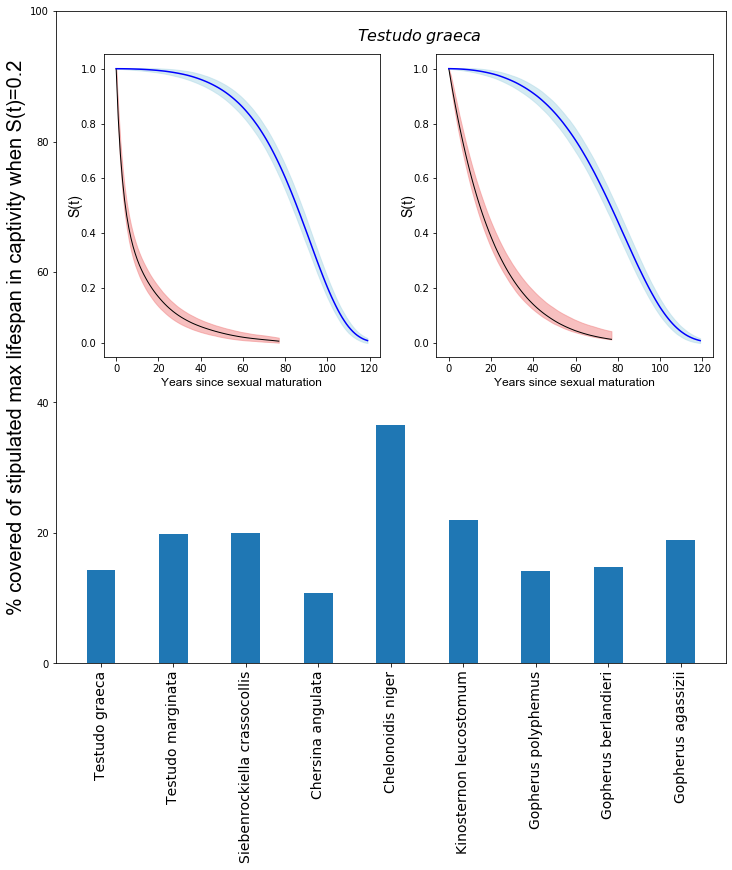

In [93]:
fig, ax = plt.subplots(figsize=(12,12))
font = {"fontname": "Arial"}

n_std = 3  # Number of standard deviations

### Bar plot ###
bar_width = 0.40 
ax.bar(negligible_senescing_species.keys(), bar_plot_data, bar_width)
ax.set_xticklabels(negligible_senescing_species.keys(), rotation=90, fontsize=14)
ax.set_ylabel("% covered of stipulated max lifespan in captivity when S(t)=0.2", fontsize=20, **font)
ax.set_ylim([0, 100])


### Left inserted panel ###
left, bottom, width, height = [0.18, 0.48, 0.32, 0.35] # Unitless percentages of the figure size where 0,0 is bottom left
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlabel("Years since sexual maturation",fontsize=12, **font)
ax2.set_ylabel("S(t)", fontsize=14, **font, labelpad=-2);
ax2.text(114, 1.1, r'$\it{Testudo}$ $\it{graeca}$', fontsize=16, **font)

# Mean S(t) based on reported mortality + senescence, black line
ax2.plot(range(t_max_cap), mean_cap_comb_f, 'k-', linewidth=1.0)
# S(t) +/- 3 std based on reported mortality, red shaded area
ax2.fill_between(range(t_max_cap), mean_cap - n_std * std_cap, mean_cap + n_std * std_cap, color='lightcoral', alpha=0.5)
# S(t) based on mortality from senescence only, blue line and shaded area
ax2.plot(range(t_max_so), mean_so_f, 'b-');
ax2.fill_between(range(t_max_so), mean_so_f - n_std * std_so_f, mean_so_f + n_std * std_so_f, color='lightblue', alpha=0.5)


### Right inserted panel ###
left, bottom, width, height = [0.565, 0.48, 0.32, 0.35] 
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_ylabel("S(t)", fontsize=14, **font, labelpad=-2)
ax3.set_xlabel("Years since sexual maturation", fontsize=12, **font)

# Mean S(t) from constant environmental mortality + senescence, black line
ax3.plot(range(t_max_cap), mean_cap_comb_sm, 'k-', linewidth=1.0)
# S(t) +/- 3 std from constant environmental mortality, red shaded area 
ax3.fill_between(range(t_max_cap), mean_cap_const - n_std * std_cap_const, mean_cap_const + n_std * std_cap_const, color='lightcoral', alpha=0.5)
# S(t) based on mortality from senescence only, blue line and shaded area
ax3.plot(range(t_max_so), mean_so_sm,'b-');
ax3.fill_between(range(t_max_so), mean_so_sm - n_std * std_so_sm, mean_so_sm + n_std * std_so_sm, color='lightblue', alpha=0.5);

# plt.savefig('Science_fig2.pdf', dpi = 600, bbox_inches="tight");